<a href="https://colab.research.google.com/github/abdulwaheedTMU/Project3/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA

In [1]:
# Mount Google Drive (if needed)
from google.colab import drive
import os
drive.mount('/content/drive')

# Install required packages (if not already installed)
!pip install ultralytics opencv-python pillow torch torchvision


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 20.2 MB/s eta 0:00:00


Step 1

Step 1: Original image loaded successfully.
Step 2: Image converted to grayscale and blurred.
Grayscale image saved as: grayscale_image_20241213_035953.jpeg
Step 3: Threshold applied to separate PCB from background.
Thresholded image saved as: thresholded_image_20241213_035953.jpeg
Step 4: 4703 contours found. Selecting the largest one.
Step 5: Mask created based on the largest contour.
Mask image saved as: mask_image_20241213_035953.jpeg
Step 6: PCB extracted using the mask.
Extracted image saved as: extracted_image_20241213_035953.jpeg


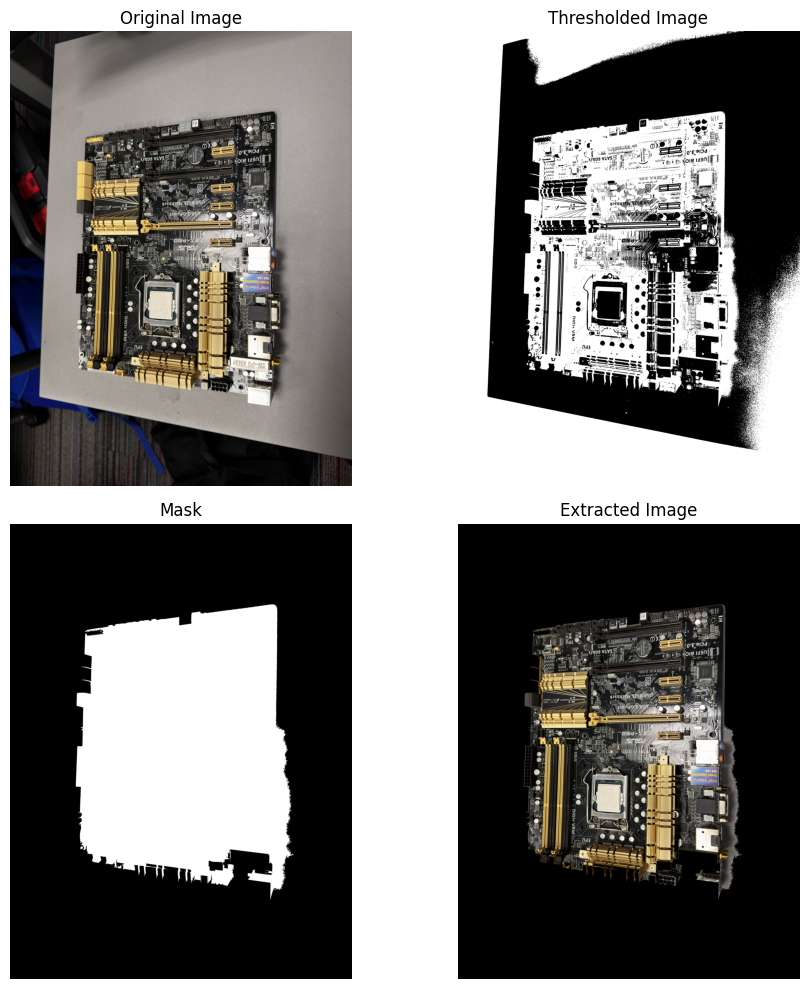

Final Summary:
Original Image Shape: (5792, 4344, 3)
Extracted Image Shape: (5792, 4344, 3)
Mask Dimensions: (5792, 4344)
Number of Contours Found: 4703


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  # For displaying images in Colab or non-GUI environments
import os
from datetime import datetime

# Function to generate unique filenames
def generate_unique_filename(base_name, extension="jpeg"):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    return f"{base_name}_{timestamp}.{extension}"

# Define output directory for saving images
output_dir = '/content/drive/MyDrive/Project3Data/step1/'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Path to your motherboard image (adjust as needed)
image_path = '/content/drive/MyDrive/Project3Data/motherboard_image.JPEG'

# Read the image
img = cv2.imread(image_path)
if img is None:
    print("Error: Could not read the image. Check the image_path.")
else:
    print("Step 1: Original image loaded successfully.")

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian Blur to smooth the image and reduce noise
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    print("Step 2: Image converted to grayscale and blurred.")

    # Save the grayscale image
    gray_filename = generate_unique_filename("grayscale_image", "jpeg")
    cv2.imwrite(os.path.join(output_dir, gray_filename), gray)
    print(f"Grayscale image saved as: {gray_filename}")

    # Apply threshold (adjust threshold value as needed)
    _, thresh = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY_INV)
    print("Step 3: Threshold applied to separate PCB from background.")

    # Save the thresholded image
    thresh_filename = generate_unique_filename("thresholded_image", "jpeg")
    cv2.imwrite(os.path.join(output_dir, thresh_filename), thresh)
    print(f"Thresholded image saved as: {thresh_filename}")

    #min_contour_area = 2000  # Adjust based on your image
    #filtered_contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        print("No contours found. Try adjusting the threshold or preprocessing steps.")
    else:
        print(f"Step 4: {len(contours)} contours found. Selecting the largest one.")
        # Find the largest contour assuming the PCB is the largest object
        largest_contour = max(contours, key=cv2.contourArea)

        # Create a mask based on the largest contour
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [largest_contour], -1, 255, -1)
        print("Step 5: Mask created based on the largest contour.")

        # Save the mask image
        mask_filename = generate_unique_filename("mask_image", "jpeg")
        cv2.imwrite(os.path.join(output_dir, mask_filename), mask)
        print(f"Mask image saved as: {mask_filename}")

        # Extract the PCB using bitwise_and
        mask_3ch = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
        extracted = cv2.bitwise_and(img, mask_3ch)
        print("Step 6: PCB extracted using the mask.")

        # Save the extracted image
        extracted_filename = generate_unique_filename("extracted_image", "jpeg")
        cv2.imwrite(os.path.join(output_dir, extracted_filename), extracted)
        print(f"Extracted image saved as: {extracted_filename}")

        # Display results
        fig, axs = plt.subplots(2, 2, figsize=(10, 10))
        axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[0, 0].set_title("Original Image")
        axs[0, 0].axis("off")

        axs[0, 1].imshow(thresh, cmap="gray")
        axs[0, 1].set_title("Thresholded Image")
        axs[0, 1].axis("off")

        axs[1, 0].imshow(mask, cmap="gray")
        axs[1, 0].set_title("Mask")
        axs[1, 0].axis("off")

        axs[1, 1].imshow(cv2.cvtColor(extracted, cv2.COLOR_BGR2RGB))
        axs[1, 1].set_title("Extracted Image")
        axs[1, 1].axis("off")

        plt.tight_layout()
        plt.show()

        # Print final result summary
        print("Final Summary:")
        print(f"Original Image Shape: {img.shape}")
        print(f"Extracted Image Shape: {extracted.shape}")
        print(f"Mask Dimensions: {mask.shape}")
        print(f"Number of Contours Found: {len(contours)}")


In [7]:
from ultralytics import YOLO

# If you have YOLOv8 installed already, just proceed:
model = YOLO('yolov8n.pt')  # Using the nano model as recommended

# Set paths and parameters
data_path = '/content/drive/MyDrive/Project3Data/data/data.yaml'  # Replace with your data.yaml path
epochs = 100      # Adjust based on your hardware and dataset
batch_size = 8     # Adjust based on your GPU memory
img_size = 900     # Recommended minimum image size

# Train the model
model.train(
    data=data_path,
    epochs=epochs,
    batch=batch_size,
    imgsz=img_size,
    name='pcb_component_detector'
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 87.7MB/s]


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Project3Data/data/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=900, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=pcb_component_detector, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

100%|██████████| 755k/755k [00:00<00:00, 18.2MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.3MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[900] must be multiple of max stride 32, updating to [928]


train: Scanning /content/drive/MyDrive/Project3Data/data/train/labels... 544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 544/544 [03:33<00:00,  2.55it/s]


train: New cache created: /content/drive/MyDrive/Project3Data/data/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 108783. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Project3Data/data/valid/labels... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:38<00:00,  2.76it/s]

val: New cache created: /content/drive/MyDrive/Project3Data/data/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 19108. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/pcb_component_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 928 train, 928 val
Using 2 dataloader workers
Logging results to runs/detect/pcb_component_detector
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.59G      2.176      4.204      1.252       3204        928: 100%|██████████| 68/68 [00:37<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        105      19108      0.836     0.0524     0.0499     0.0257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.3G      2.249       3.13      1.134       1389        928: 100%|██████████| 68/68 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        105      19108      0.615     0.0893     0.0643     0.0349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.2G      2.238      2.686      1.104       2324        928: 100%|██████████| 68/68 [00:34<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        105      19108      0.566      0.106      0.101     0.0567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      13.7G      2.157       2.38      1.087       1971        928: 100%|██████████| 68/68 [00:33<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        105      19108       0.58      0.146      0.131     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      15.3G      2.099      2.212      1.082       3191        928: 100%|██████████| 68/68 [00:37<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        105      19108      0.558      0.149       0.16     0.0953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      14.9G      2.079      2.066       1.06       2516        928: 100%|██████████| 68/68 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]

                   all        105      19108      0.382      0.212      0.168     0.0993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.3G      2.044      1.988      1.061       2771        928: 100%|██████████| 68/68 [00:33<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.04s/it]

                   all        105      19108      0.538      0.249      0.193      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.11G      1.994       1.92      1.047       3077        928: 100%|██████████| 68/68 [00:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        105      19108      0.559      0.237      0.215      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.8G      1.981      1.824      1.041       2692        928: 100%|██████████| 68/68 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        105      19108      0.562      0.268      0.248      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      12.5G      1.961      1.825      1.036       2514        928: 100%|██████████| 68/68 [00:37<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.19s/it]

                   all        105      19108       0.54      0.282      0.241      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.59G      1.906      1.733      1.028       1788        928: 100%|██████████| 68/68 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]

                   all        105      19108      0.576      0.286      0.273      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.89G      1.877      1.702      1.018       1719        928: 100%|██████████| 68/68 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]

                   all        105      19108      0.565      0.287      0.268      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.1G      1.886      1.691      1.022       1873        928: 100%|██████████| 68/68 [00:34<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        105      19108      0.523      0.319      0.278      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      12.2G      1.875      1.653      1.017       1666        928: 100%|██████████| 68/68 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        105      19108      0.585      0.324      0.318      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.7G      1.832      1.607      1.007       2992        928: 100%|██████████| 68/68 [00:38<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]

                   all        105      19108       0.55      0.355      0.318      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.4G       1.84      1.589      1.003       2525        928: 100%|██████████| 68/68 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        105      19108      0.643      0.312      0.336      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      14.6G      1.846       1.58       1.01       2154        928: 100%|██████████| 68/68 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        105      19108      0.544      0.362      0.362      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      14.4G        1.8      1.536     0.9977       2506        928: 100%|██████████| 68/68 [00:33<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.03s/it]

                   all        105      19108      0.602      0.329      0.366      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.94G      1.808      1.511     0.9952       2361        928: 100%|██████████| 68/68 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        105      19108      0.612      0.366      0.373      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.8G      1.812      1.511      1.002       2351        928: 100%|██████████| 68/68 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all        105      19108      0.602      0.372      0.385      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.82G       1.75      1.487     0.9872       3244        928: 100%|██████████| 68/68 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]

                   all        105      19108      0.528      0.393      0.408      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.2G      1.786      1.473     0.9929       1753        928: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]

                   all        105      19108      0.473      0.407       0.41       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      15.4G      1.754       1.45     0.9924       2372        928: 100%|██████████| 68/68 [00:34<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        105      19108      0.454       0.43       0.42      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      12.5G      1.786      1.462      0.993       1938        928: 100%|██████████| 68/68 [00:34<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        105      19108      0.512      0.417      0.419      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      13.7G       1.74      1.433     0.9815       2002        928: 100%|██████████| 68/68 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        105      19108      0.652      0.369      0.424      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.7G       1.76      1.428      0.981       2090        928: 100%|██████████| 68/68 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]

                   all        105      19108       0.47      0.468      0.452      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      12.8G      1.759      1.398      0.979       2736        928: 100%|██████████| 68/68 [00:32<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all        105      19108        0.6      0.413      0.449      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      15.6G      1.711      1.388     0.9797       1994        928: 100%|██████████| 68/68 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        105      19108      0.558      0.441      0.464      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      13.5G      1.734      1.387      0.975       2684        928: 100%|██████████| 68/68 [00:34<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]

                   all        105      19108      0.597      0.429      0.458      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      15.2G       1.71      1.373     0.9814       2910        928: 100%|██████████| 68/68 [00:33<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]

                   all        105      19108      0.473      0.483      0.477      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      13.9G       1.72      1.378     0.9753       3155        928: 100%|██████████| 68/68 [00:33<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]

                   all        105      19108      0.538      0.467      0.484      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.49G      1.687      1.319     0.9694       2513        928: 100%|██████████| 68/68 [00:34<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        105      19108      0.603      0.432      0.489      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.6G      1.687      1.319     0.9737       2120        928: 100%|██████████| 68/68 [00:34<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        105      19108      0.618      0.472      0.509      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       9.5G       1.71      1.334     0.9737       3431        928: 100%|██████████| 68/68 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        105      19108      0.593      0.462      0.498      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.15G       1.67      1.294     0.9631       1979        928: 100%|██████████| 68/68 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        105      19108      0.586      0.485      0.517      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.72G      1.694      1.308     0.9667       3917        928: 100%|██████████| 68/68 [00:33<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        105      19108      0.621      0.462      0.507      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      13.4G      1.697      1.292     0.9623       3399        928: 100%|██████████| 68/68 [00:38<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        105      19108      0.582      0.504      0.529      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.41G       1.68      1.299     0.9687       2605        928: 100%|██████████| 68/68 [00:34<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        105      19108      0.577      0.474      0.505      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      14.5G       1.66      1.273     0.9579       3151        928: 100%|██████████| 68/68 [00:33<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        105      19108      0.555      0.534      0.539      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      12.9G      1.645       1.25     0.9617       2274        928: 100%|██████████| 68/68 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        105      19108      0.565      0.533      0.553      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      14.8G      1.669      1.259     0.9648       1662        928: 100%|██████████| 68/68 [00:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        105      19108       0.57      0.519      0.539      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.58G      1.672      1.253      0.963       1855        928: 100%|██████████| 68/68 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        105      19108      0.585      0.544      0.567      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       6.7G      1.652      1.242     0.9608       2491        928: 100%|██████████| 68/68 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        105      19108       0.62      0.489      0.534      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      15.4G       1.64      1.211     0.9571       1961        928: 100%|██████████| 68/68 [00:32<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        105      19108      0.623      0.537      0.579      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.59G      1.641      1.229     0.9602       2540        928: 100%|██████████| 68/68 [00:33<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]

                   all        105      19108      0.628      0.515      0.557      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.91G      1.635      1.216     0.9557       1876        928: 100%|██████████| 68/68 [00:34<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        105      19108      0.655      0.539      0.591       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      14.1G      1.629      1.209     0.9519       1912        928: 100%|██████████| 68/68 [00:34<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        105      19108        0.6      0.551      0.575      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.36G      1.604      1.193     0.9525       2548        928: 100%|██████████| 68/68 [00:37<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        105      19108      0.617      0.565      0.591      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      14.2G      1.627      1.195      0.953       1871        928: 100%|██████████| 68/68 [00:34<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        105      19108      0.601      0.569      0.591      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.56G      1.594      1.183     0.9506       1229        928: 100%|██████████| 68/68 [00:34<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        105      19108      0.642      0.523      0.567      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.43G      1.618      1.188     0.9457       2287        928: 100%|██████████| 68/68 [00:34<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        105      19108      0.678      0.547      0.595      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.7G      1.593       1.17     0.9455       2474        928: 100%|██████████| 68/68 [00:34<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        105      19108      0.664      0.568       0.62      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      13.7G      1.579      1.161     0.9434       2663        928: 100%|██████████| 68/68 [00:33<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        105      19108      0.664      0.566      0.611       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      12.2G      1.613      1.172      0.948       2627        928: 100%|██████████| 68/68 [00:36<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        105      19108       0.67      0.577      0.618      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      14.6G      1.583      1.135     0.9399       1689        928: 100%|██████████| 68/68 [00:33<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        105      19108      0.718      0.566      0.624      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      13.1G      1.567      1.131     0.9449       2460        928: 100%|██████████| 68/68 [00:34<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        105      19108      0.645      0.576      0.617      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.67G      1.558      1.147     0.9409       2079        928: 100%|██████████| 68/68 [00:33<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]

                   all        105      19108      0.693      0.557      0.613      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      13.9G      1.558      1.119     0.9388       2002        928: 100%|██████████| 68/68 [00:32<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        105      19108      0.742       0.55      0.622      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      12.9G      1.553       1.12     0.9376       2719        928: 100%|██████████| 68/68 [00:32<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        105      19108      0.655      0.594      0.625      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      15.2G      1.588      1.147     0.9368       2188        928: 100%|██████████| 68/68 [00:37<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        105      19108      0.629      0.602      0.626      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.19G      1.567      1.135     0.9344       2062        928: 100%|██████████| 68/68 [00:34<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        105      19108      0.656      0.583      0.632      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100        15G      1.573       1.11     0.9399       1933        928: 100%|██████████| 68/68 [00:33<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]

                   all        105      19108      0.693      0.612      0.649      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.3G      1.592      1.136     0.9437       2162        928: 100%|██████████| 68/68 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        105      19108      0.711      0.593      0.638      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.5G      1.569      1.114     0.9381       2047        928: 100%|██████████| 68/68 [00:34<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        105      19108      0.765       0.59      0.658      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.3G      1.556      1.107      0.934       1125        928: 100%|██████████| 68/68 [00:35<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        105      19108      0.732      0.604      0.657      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      12.5G      1.571      1.106     0.9377       1664        928: 100%|██████████| 68/68 [00:34<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]

                   all        105      19108      0.753      0.603      0.662      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.91G       1.55      1.089     0.9358       2153        928: 100%|██████████| 68/68 [00:32<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

                   all        105      19108      0.755      0.596      0.658      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      15.3G      1.549      1.094     0.9296       2158        928: 100%|██████████| 68/68 [00:34<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        105      19108      0.754      0.588       0.66      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.5G      1.536      1.068     0.9322       3188        928: 100%|██████████| 68/68 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        105      19108      0.763      0.611      0.665       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       7.1G      1.564       1.08     0.9312       2943        928: 100%|██████████| 68/68 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        105      19108      0.731      0.612       0.66      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.54G      1.546      1.081     0.9354       3792        928: 100%|██████████| 68/68 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        105      19108       0.75      0.607      0.664      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.64G      1.527      1.066     0.9332       1673        928: 100%|██████████| 68/68 [00:33<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        105      19108      0.771       0.61      0.663      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      12.3G      1.553      1.079     0.9304       1396        928: 100%|██████████| 68/68 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        105      19108      0.766      0.615      0.675      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      10.7G      1.513      1.058     0.9262       2565        928: 100%|██████████| 68/68 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        105      19108      0.803      0.604      0.674      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      13.8G      1.541      1.076     0.9373       1992        928: 100%|██████████| 68/68 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        105      19108      0.782      0.619      0.675      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100        13G      1.526      1.058     0.9281       1638        928: 100%|██████████| 68/68 [00:33<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        105      19108      0.768       0.61      0.678      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      13.5G      1.533      1.076     0.9274       2489        928: 100%|██████████| 68/68 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        105      19108      0.782      0.606      0.673      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      12.9G      1.532      1.061     0.9286       2415        928: 100%|██████████| 68/68 [00:33<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        105      19108      0.791      0.603      0.675      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      13.3G      1.531      1.057      0.931       1806        928: 100%|██████████| 68/68 [00:33<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        105      19108      0.791      0.599      0.673      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100        14G      1.517      1.047     0.9262       2319        928: 100%|██████████| 68/68 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        105      19108       0.76       0.63      0.677       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100        12G      1.531      1.048     0.9267       1666        928: 100%|██████████| 68/68 [00:34<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        105      19108      0.759       0.61      0.671      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      12.5G      1.502      1.033     0.9268       2258        928: 100%|██████████| 68/68 [00:33<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        105      19108      0.832      0.605      0.682      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.1G      1.492      1.031     0.9236       1901        928: 100%|██████████| 68/68 [00:37<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        105      19108      0.785       0.62      0.682      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      15.6G       1.49      1.032     0.9246       3288        928: 100%|██████████| 68/68 [00:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        105      19108      0.772      0.619      0.682       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.9G      1.524      1.036      0.927       2221        928: 100%|██████████| 68/68 [00:34<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        105      19108      0.797       0.62      0.684      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      14.3G      1.484      1.017     0.9176       2629        928: 100%|██████████| 68/68 [00:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        105      19108       0.81       0.62      0.685      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      12.5G      1.506      1.023     0.9214       2089        928: 100%|██████████| 68/68 [00:32<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]

                   all        105      19108      0.804      0.615      0.683       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      12.9G      1.501      1.037     0.9212       1925        928: 100%|██████████| 68/68 [00:34<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        105      19108       0.83      0.606      0.683      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.35G      1.503      1.032     0.9222       3061        928: 100%|██████████| 68/68 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        105      19108        0.8      0.631      0.693      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      12.6G      1.517      1.028     0.9209       3430        928: 100%|██████████| 68/68 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        105      19108        0.8      0.616      0.686      0.493


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       7.7G      1.525      1.088     0.9285       1349        928: 100%|██████████| 68/68 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        105      19108      0.739       0.62      0.668      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.83G      1.489      1.043      0.923       1899        928: 100%|██████████| 68/68 [00:30<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        105      19108      0.747      0.625       0.67      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.24G      1.492      1.032     0.9242       1453        928: 100%|██████████| 68/68 [00:31<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        105      19108      0.773      0.615      0.673      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      12.7G      1.495      1.024     0.9223       1942        928: 100%|██████████| 68/68 [00:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        105      19108      0.802      0.611      0.679      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      12.4G      1.475      1.012      0.916       1300        928: 100%|██████████| 68/68 [00:31<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        105      19108      0.772      0.624      0.681      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.95G      1.469      1.006      0.919       1564        928: 100%|██████████| 68/68 [00:33<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        105      19108      0.789      0.611      0.683      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.88G      1.477      1.012     0.9165       1161        928: 100%|██████████| 68/68 [00:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        105      19108      0.797      0.615      0.685      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      10.2G      1.461      1.002     0.9158       1451        928: 100%|██████████| 68/68 [00:33<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        105      19108      0.775      0.626      0.684      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.95G      1.474      1.007     0.9164       1151        928: 100%|██████████| 68/68 [00:32<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        105      19108      0.777      0.626      0.686      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      12.2G      1.468      1.008     0.9181       1064        928: 100%|██████████| 68/68 [00:32<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]

                   all        105      19108      0.779      0.629      0.687      0.491



100 epochs completed in 1.128 hours.
Optimizer stripped from runs/detect/pcb_component_detector/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/pcb_component_detector/weights/best.pt, 6.3MB

Validating runs/detect/pcb_component_detector/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:24<00:00,  3.46s/it]


                   all        105      19108      0.798      0.632      0.693      0.502
                Button         14         45       0.88      0.978      0.976      0.792
             Capacitor        104       7251      0.773      0.392      0.539      0.281
             Connector         76        659      0.784      0.866      0.885       0.68
                 Diode         11         53      0.819      0.341      0.428      0.306
Electrolytic Capacitor         15        160      0.876       0.88      0.925      0.666
                    IC         95       1322      0.809      0.884      0.911      0.682
              Inductor         12         45       0.88      0.511      0.586      0.487
                   Led         18        127      0.849       0.63      0.705      0.509
                  Pads         20        143      0.661      0.161      0.238      0.166
                  Pins         10        151      0.618      0.813        0.8      0.569
              Resisto

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79ac5f7ba2f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

Step 3


image 1/1 /content/drive/MyDrive/Project3Data/data/evaluation/ardmega.jpg: 832x928 5 Capacitors, 6 Connectors, 6 ICs, 14 Resistors, 12.9ms
Speed: 9.7ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 928)
Results saved to runs/detect/predict6


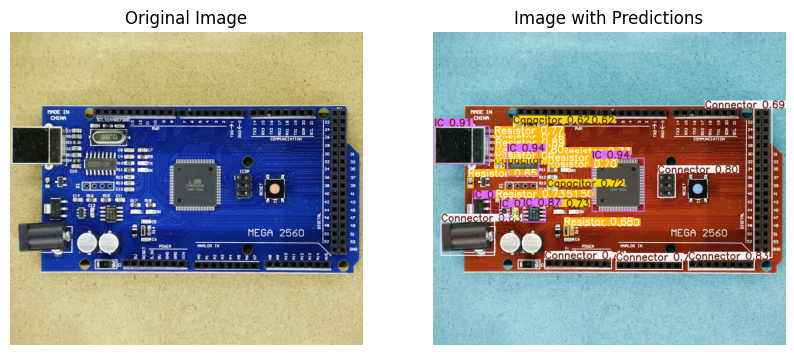


image 1/1 /content/drive/MyDrive/Project3Data/data/evaluation/arduno.jpg: 640x928 2 Capacitors, 7 Connectors, 2 Electrolytic Capacitors, 6 ICs, 1 Led, 8 Resistors, 9.8ms
Speed: 6.4ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 928)
Results saved to runs/detect/predict6


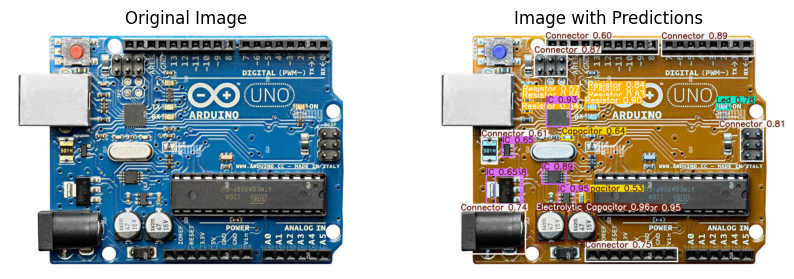


image 1/1 /content/drive/MyDrive/Project3Data/data/evaluation/rasppi.jpg: 640x928 6 Capacitors, 9 Connectors, 1 Electrolytic Capacitor, 5 ICs, 1 Resistor, 8.8ms
Speed: 4.6ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 928)
Results saved to runs/detect/predict6


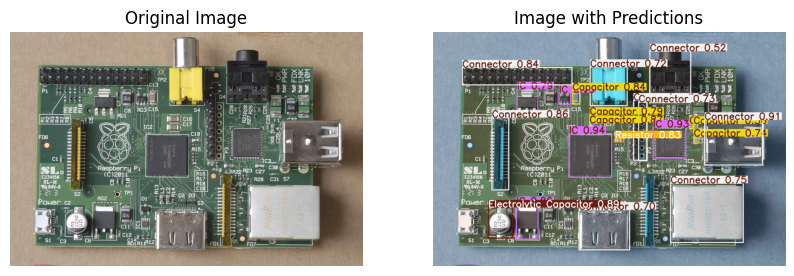

Evaluation and display of original and processed images completed.


In [14]:
# Evaluate and display predictions
for image_path in test_image_paths:
    # Perform prediction on the image
    results = model.predict(source=image_path, conf=0.5, save=True)  # Confidence threshold at 0.5

    # Loop through each result in the results list
    for result in results:
        # Display original image
        plt.figure(figsize=(10, 5))  # Adjust figure size as needed

        # Load original image
        original_image = plt.imread(image_path)
        plt.subplot(1, 2, 1)  # Two columns: original and processed
        plt.imshow(original_image)
        plt.axis('off')  # Turn off axis for better visualization
        plt.title("Original Image")  # Title for original image

        # Display processed image with predictions
        plt.subplot(1, 2, 2)
        plt.imshow(result.plot())  # Use `plot` method to display predictions
        plt.axis('off')  # Turn off axis for better visualization
        plt.title("Image with Predictions")  # Title for processed image

        plt.show()

print("Evaluation and display of original and processed images completed.")
